<a href="https://colab.research.google.com/github/MingxiaWu/jupyterlab/blob/main/MichelleWu_Homework2_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework#2: Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from TrainingNeuralNets notebook for handwriten digits recogntion, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12021401.88it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 229942.16it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4268183.77it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13921519.66it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



Here we can see one of the images.

In [3]:
image, label = next(iter(trainloader))
#helper.imshow(image[10,:]);

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

    imshow(image[10,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
# TODO: Define your network architecture here

# Build a feed-forward network use sequential feed-forward
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
print (model)

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)
print(images.shape)
# Forward pass, get our logits
logits = model(images)
print(logits.shape)
print(labels.shape)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)
print(loss.shape)
print(loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
torch.Size([64, 784])
torch.Size([64, 10])
torch.Size([64])
torch.Size([])
tensor(2.2899, grad_fn=<NllLossBackward0>)


### Auto-gradient - how to calculate a loss and use it to perform backpropagation?

In [5]:
x = torch.randn(3,3, requires_grad=True)
print(x)

tensor([[-0.7929,  0.8243, -1.9167],
        [-0.5293, -1.2164,  1.5238],
        [ 1.1344, -0.5055, -1.0507]], requires_grad=True)


In [6]:
y = x**2
print(y)

tensor([[0.6288, 0.6795, 3.6739],
        [0.2801, 1.4796, 2.3220],
        [1.2869, 0.2555, 1.1040]], grad_fn=<PowBackward0>)


In [7]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

### The autograd module keeps track of these operations and knows how to calculate the gradient for each one. It's able to calculate the gradients for a chain of operations to any one tensor.
### Let's reduce the tensor y to a scalar value, the mean.

In [8]:
z = y.mean()
print(z)

tensor(1.3011, grad_fn=<MeanBackward0>)


In [9]:
#check the gradients for x and y
print(x.grad)
print(y.grad)

None
None


<ipython-input-9-3d94b2f518be>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


In [10]:
# To calculate the gradients, run .backward on a variable z respect to x.
z.backward()
print(z)
print("x.grad:", x.grad)
print("x/2:", x/2)
print("2*x/9:", 2*x/9)

tensor(1.3011, grad_fn=<MeanBackward0>)
x.grad: tensor([[-0.1762,  0.1832, -0.4259],
        [-0.1176, -0.2703,  0.3386],
        [ 0.2521, -0.1123, -0.2335]])
x/2: tensor([[-0.3965,  0.4122, -0.9584],
        [-0.2646, -0.6082,  0.7619],
        [ 0.5672, -0.2527, -0.5254]], grad_fn=<DivBackward0>)
2*x/9: tensor([[-0.1762,  0.1832, -0.4259],
        [-0.1176, -0.2703,  0.3386],
        [ 0.2521, -0.1123, -0.2335]], grad_fn=<DivBackward0>)


###With PyTorch, we run data forward through the network to calculate the loss, then, go backwards to calculate the gradients with respect to the loss. Once we have the gradients we can make a gradient descent step.

### Put Loss and Autograd together
when we calculate the loss and call loss.backward(), the gradients for the parameters are calculated. These gradients are used to update the weights with gradient descent. Below is an example of calculating the gradients using a backwards pass.

In [11]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        ...,
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023]])


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [12]:
# TODO: Create the network, define the criterion and optimizer

from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)
print(model.parameters())
for parameter in model.parameters():
    print(parameter.shape)



<generator object Module.parameters at 0x7af33bf96ff0>
torch.Size([128, 784])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([10, 64])
torch.Size([10])


In [13]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784) # another way to flatten

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0130, -0.0168, -0.0140,  ..., -0.0120, -0.0256,  0.0234],
        [ 0.0329, -0.0021,  0.0089,  ...,  0.0141, -0.0189,  0.0348],
        [ 0.0063, -0.0058,  0.0083,  ...,  0.0222,  0.0127,  0.0237],
        ...,
        [-0.0354,  0.0240,  0.0164,  ..., -0.0143,  0.0253,  0.0240],
        [-0.0248, -0.0183, -0.0166,  ..., -0.0052, -0.0131, -0.0016],
        [-0.0113,  0.0329,  0.0019,  ...,  0.0289, -0.0298, -0.0155]],
       requires_grad=True)
Gradient - tensor([[-4.3335e-03, -4.3335e-03, -4.3217e-03,  ..., -4.0859e-03,
         -4.1738e-03, -4.3335e-03],
        [ 1.1370e-03,  1.1370e-03,  1.1370e-03,  ...,  1.1370e-03,
          1.1370e-03,  1.1370e-03],
        [ 9.2035e-05,  9.2035e-05,  1.0577e-04,  ...,  2.1606e-04,
          1.7450e-04,  9.2035e-05],
        ...,
        [ 2.5822e-04,  2.5822e-04,  2.6751e-04,  ...,  2.7219e-04,
          2.6937e-04,  2.5822e-04],
        [ 1.2558e-03,  1.2558e-03,  1.2475e-03,  ...,  1.8608e

In [14]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0130, -0.0167, -0.0140,  ..., -0.0120, -0.0256,  0.0234],
        [ 0.0329, -0.0021,  0.0088,  ...,  0.0141, -0.0190,  0.0348],
        [ 0.0063, -0.0058,  0.0083,  ...,  0.0221,  0.0127,  0.0237],
        ...,
        [-0.0354,  0.0240,  0.0164,  ..., -0.0143,  0.0252,  0.0240],
        [-0.0248, -0.0183, -0.0166,  ..., -0.0052, -0.0131, -0.0016],
        [-0.0113,  0.0329,  0.0019,  ...,  0.0289, -0.0298, -0.0155]],
       requires_grad=True)


### TODO: Train the network here
### Train for REAL!

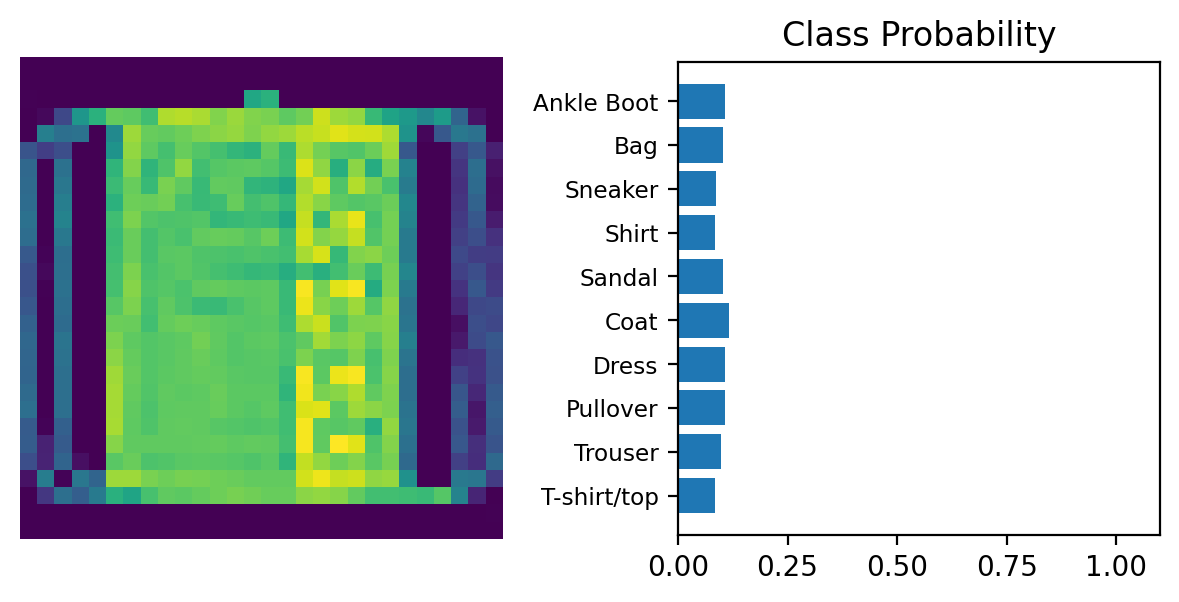

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

# Test out your network!
# Note that we will use images from testset instead of trainset

dataiter = iter(testloader)
#images, labels = dataiter.next() # original code
images, labels = next(dataiter)  #Michelle's tweak

img = images[2
             ]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
#ps =  torch.exp(logps) # original code

ps = F.softmax(model(img), dim=1)

# Plot the image and probabilities
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

## Extra Credit: Other Evaluation of model and results of adjusting the model

Add any other evaluation of the performance of your model or adjustment of your model in the following ...

In [16]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

losses = []
epochs = 10
for e in range(epochs):
    running_loss = 0
    loss_per_batch = []
    # There is a total of 60000 28x28 images in the dataset, with 64 images per batche,
    # There are 938 batches (with the last batch having only 32 images): 937*64+32 = 60000.
    # One epoch runs through all batches in trainloader (938 batches in this case)
    for images, labels in trainloader:
        # One iteration takes one batch of images (64 not 1), runs through a forward pass,
        # gets one loss, runs a backward pass and adjusts weight by gradient decent.
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        loss_per_batch.append(loss.item())

        running_loss += loss.item()
    else:
        losses.append(loss_per_batch)
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.6167627238769775
Training loss: 0.829775481304126
Training loss: 0.674610109789285
Training loss: 0.6092623086816975
Training loss: 0.5666031080649606
Training loss: 0.5342088332499014
Training loss: 0.509809325371724
Training loss: 0.4908368896319668
Training loss: 0.4760392922868352
Training loss: 0.4637928436369276


Length of trainloader:938


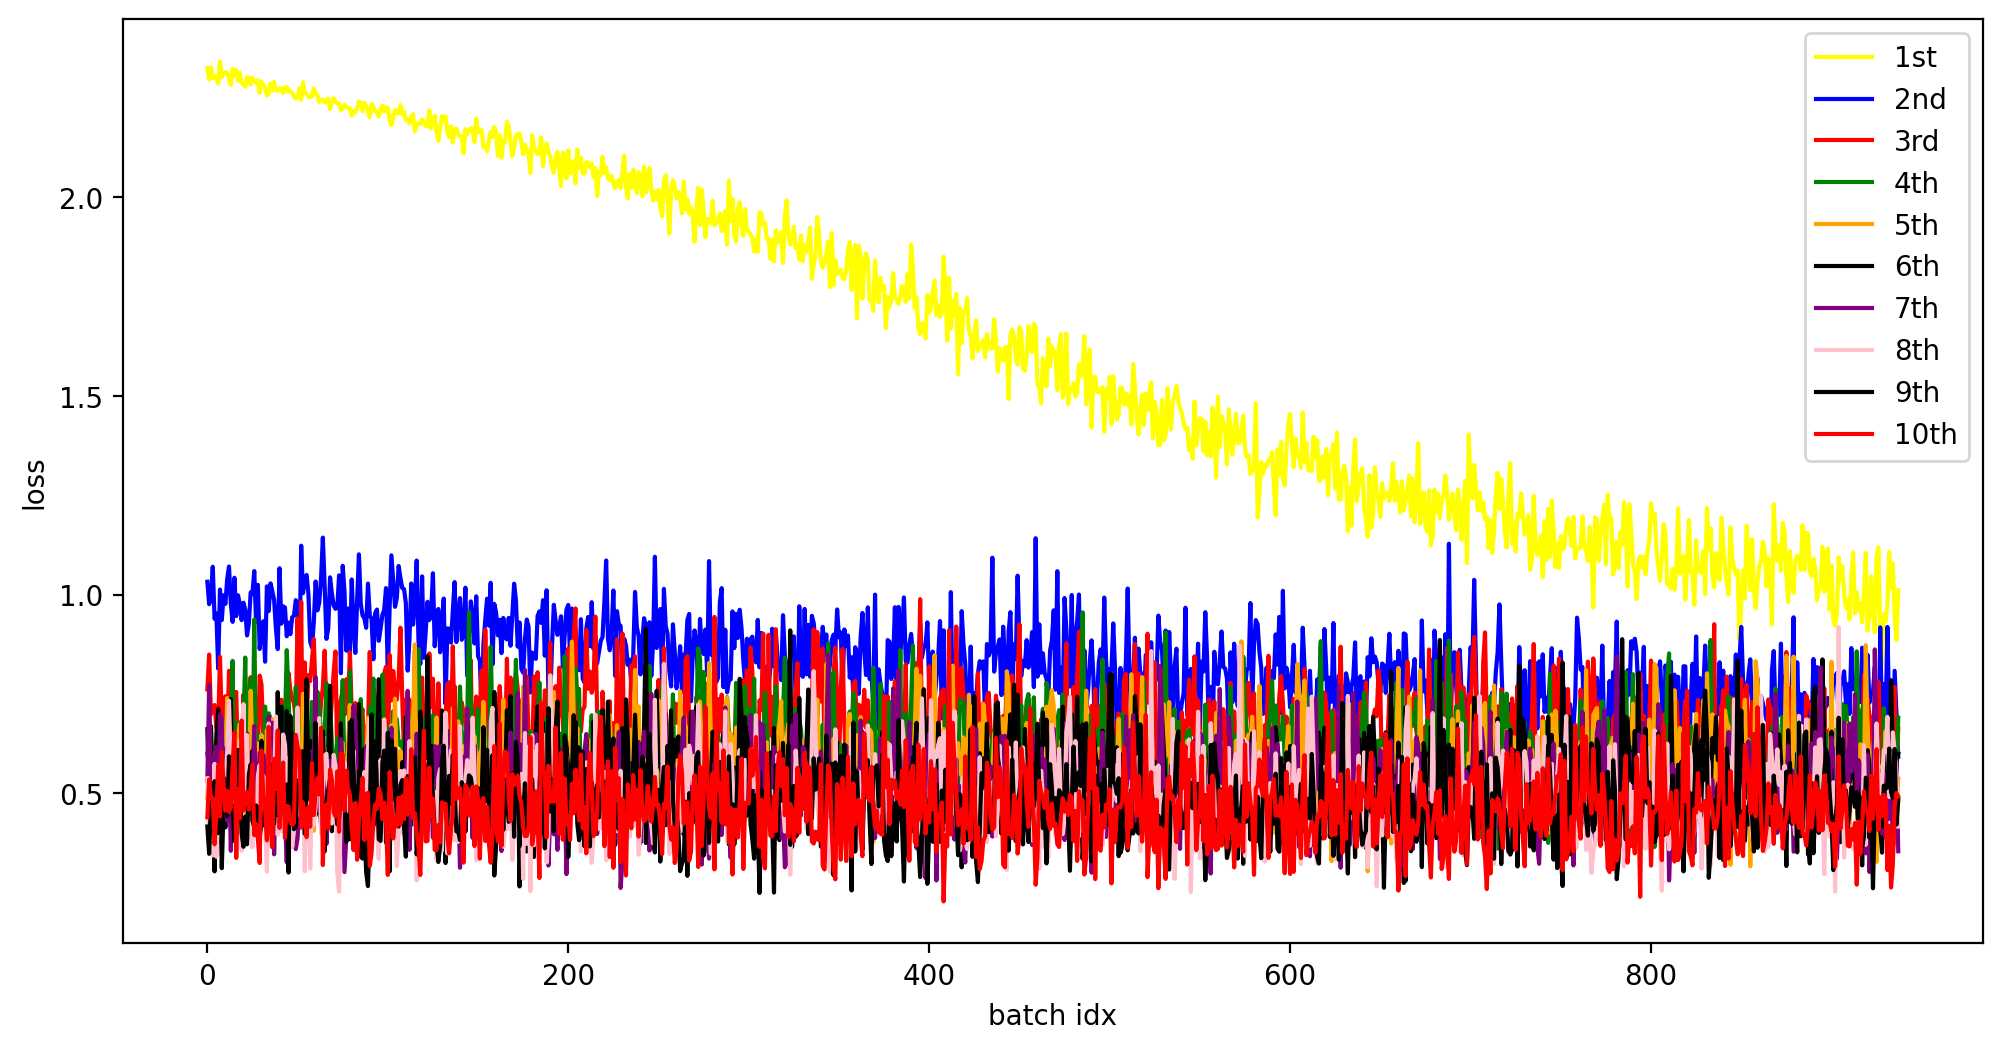

In [17]:
# Plot the loss per batch per epoch
x = np.arange(938)
print (f"Length of trainloader:{len(trainloader)}")
nplosses = np.array(losses)
plt.figure(figsize=[12, 6])
plt.plot(x, losses[0], color='yellow', label="1st")
plt.plot(x, losses[1], color='b', label="2nd")
plt.plot(x, losses[2], color='r', label="3rd")
plt.plot(x, losses[3], color='g', label="4th")
plt.plot(x, losses[4], color='orange', label="5th")
plt.plot(x, losses[5], color='black', label="6th")
plt.plot(x, losses[6], color='purple', label="7th")
plt.plot(x, losses[7], color='pink', label="8th")
plt.plot(x, losses[8], color='black', label="9th")
plt.plot(x, losses[9], color='r', label="10th")
plt.xlabel('batch idx')
plt.ylabel('loss')
plt.legend()
plt.show()

### now with the trained network, let's check out its prediction!

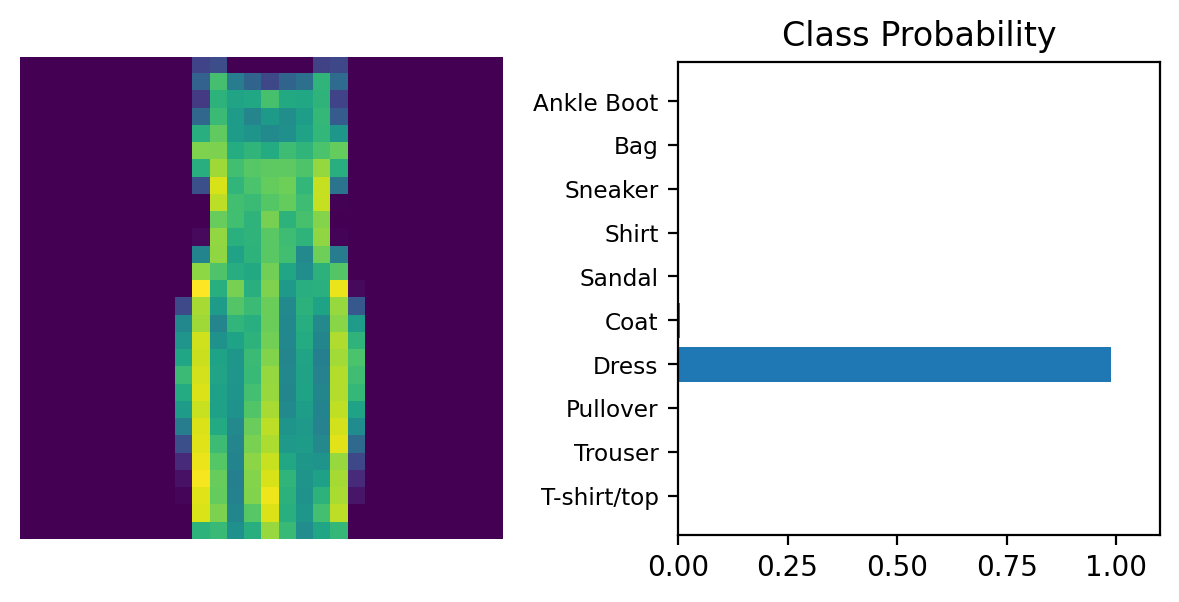

In [19]:
# we are just using an image from trainloader, in the future we'll use frorm testloader
images, labels = next(iter(trainloader))

img = images[23].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    # the block of code with gradient turned off
    # here is for detection, so just do the following to compute the forward prediction.
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps, version="Fashion")
#helper.view_classify(img, ps, version="Fashion")

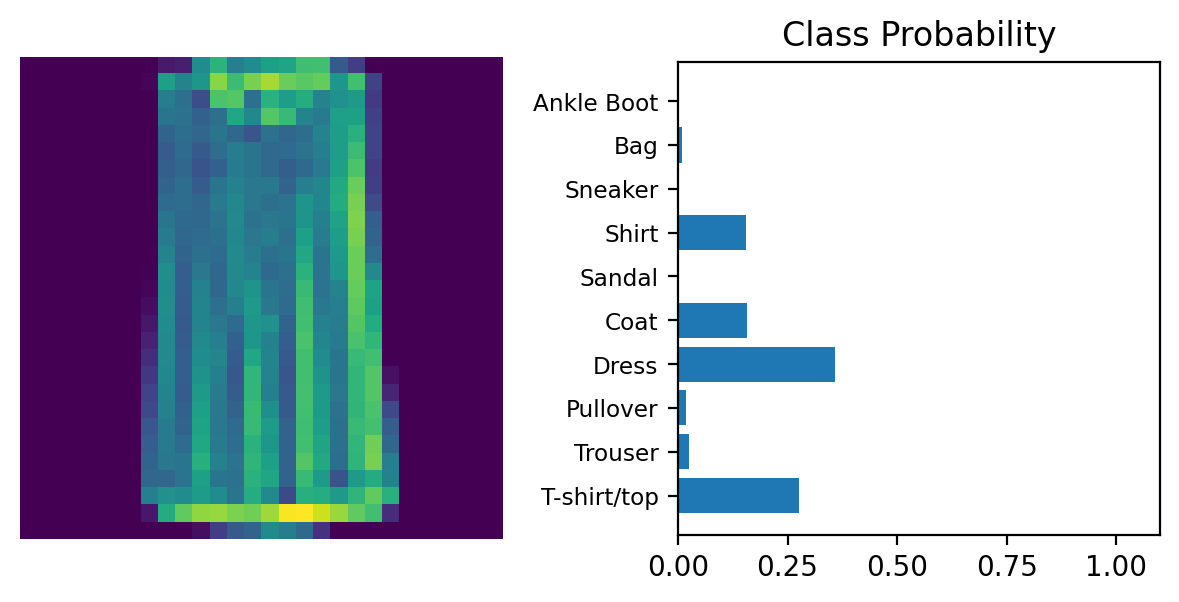

In [20]:
img = images[14].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    # the block of code with gradient turned off
    # here is for detection, so just do the following to compute the forward prediction.
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps, version="Fashion")
#helper.view_classify(img, ps, version="Fashion")

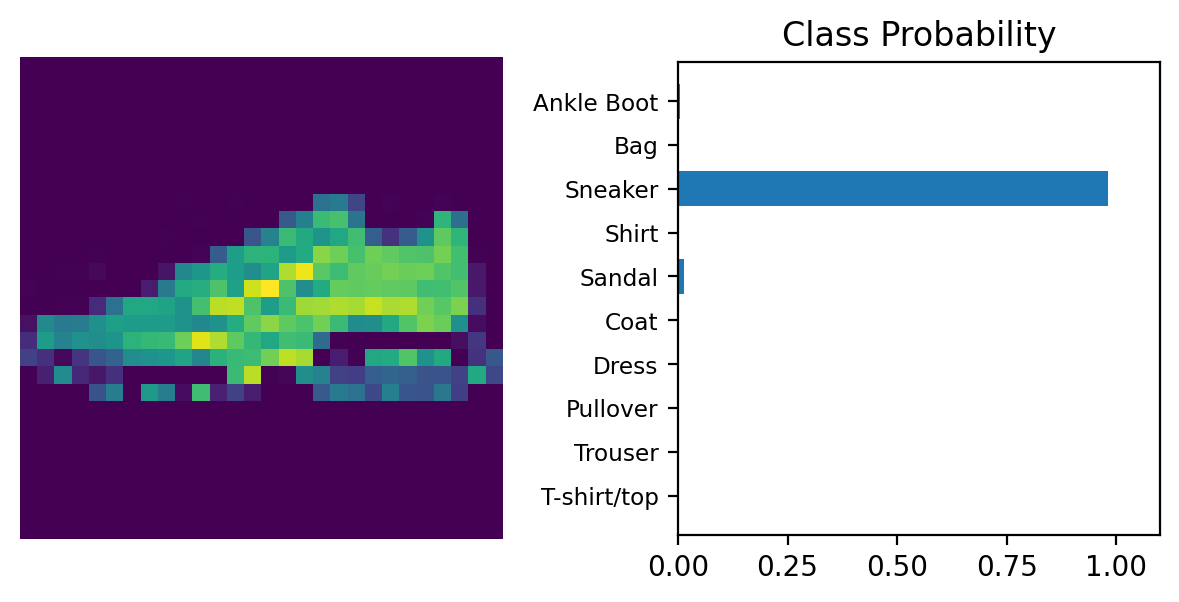

In [21]:
img = images[3].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    # the block of code with gradient turned off
    # here is for detection, so just do the following to compute the forward prediction.
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps, version="Fashion")
#helper.view_classify(img, ps, version="Fashion")

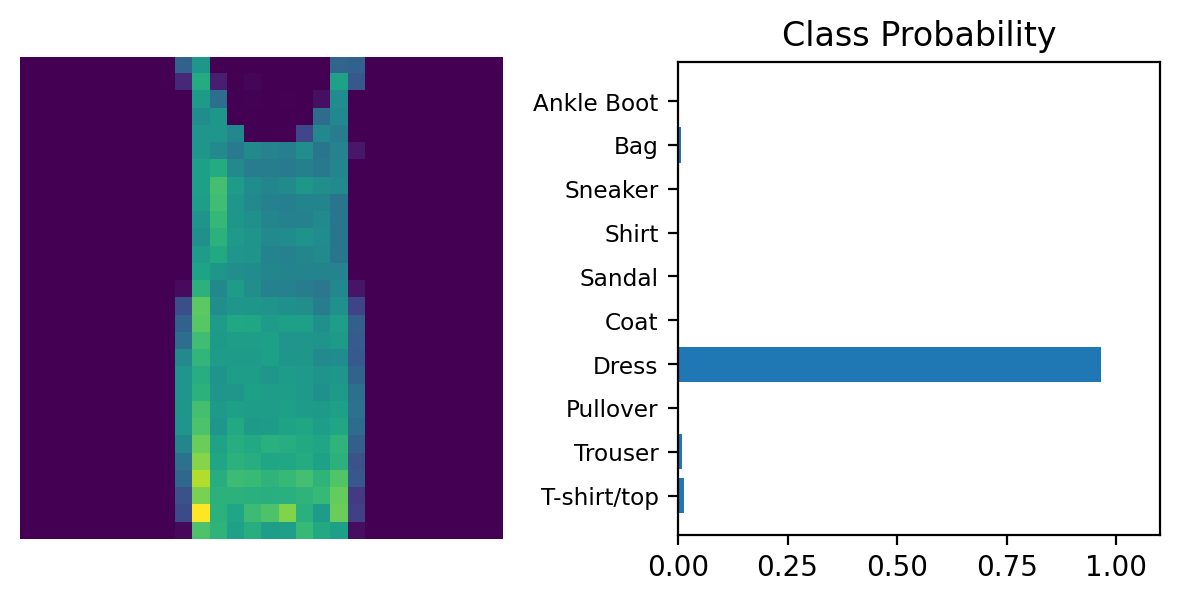

In [22]:
img = images[53].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    # the block of code with gradient turned off
    # here is for detection, so just do the following to compute the forward prediction.
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps, version="Fashion")
#helper.view_classify(img, ps, version="Fashion")

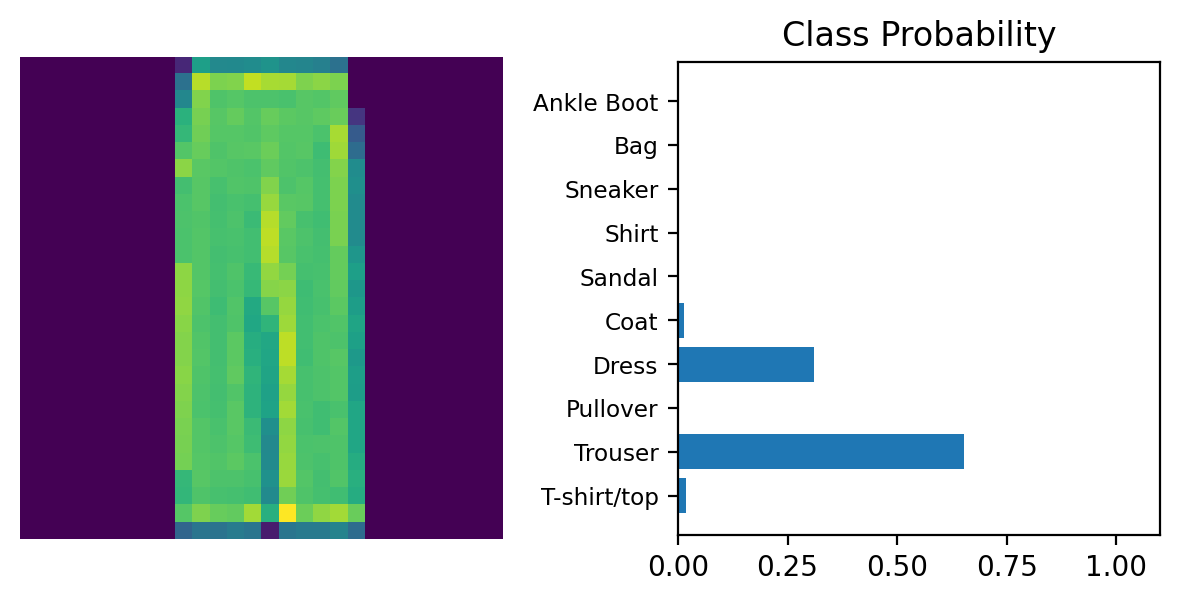

In [24]:
img = images[16].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    # the block of code with gradient turned off
    # here is for detection, so just do the following to compute the forward prediction.
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps, version="Fashion")
#helper.view_classify(img, ps, version="Fashion")